<a href="https://colab.research.google.com/github/demichie/PhD_ModelingCourse/blob/main/Lecture2/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports globali che useremo frequentemente
import numpy as np
import matplotlib.pyplot as plt

# Impostazioni per i plot (opzionale, ma rende i plot più belli)
plt.style.use('seaborn-v0_8-whitegrid') # o un altro stile che preferisci
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12

# Lecture 2: Principles of Numerical Modelling in Geosciences

## Part 1: Recap and Continuation of Lecture 1

In this first part, we will pick up where we left off in Lecture 1, discussing numerical solutions for ODEs, their implementation, and aspects of accuracy and stability.

Topics covered:
*   Numerical solution of Radioactive Decay (Euler's Method)
*   Explicit vs. Implicit Euler
*   Numerical Accuracy and Stability
*   Summary of Lecture 1 (conceptual)

![Radioactive Decay C14](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/decay_c14.png?raw=1)

### Numerical Solution of Radioactive Decay (Explicit Euler)

Recall the ODE for radioactive decay:
$$ \frac{dN}{dt} = -\lambda N(t) $$

Discretizing with the **Explicit Euler method**:
We approximate the derivative as $\frac{dN}{dt} \approx \frac{N^{n+1} - N^n}{\Delta t}$ and evaluate the right-hand side at time $t^n$:
$$ \frac{N^{n+1} - N^n}{\Delta t} = -\lambda N^n $$
Rearranging for $N^{n+1}$:
$$ N^{n+1} = N^n - \lambda \Delta t N^n = N^n (1 - \lambda \Delta t) $$

**Summary of Explicit Euler for Radioactive Decay:**
*   Initial value: $N^0 = N_0$
*   Update formula: $N^{n+1} = N^n (1 - \lambda \Delta t)$
*   Iterate for $n = 0, 1, \dots$

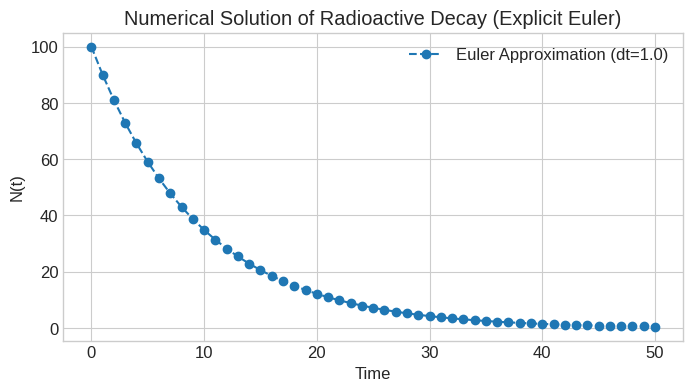

In [ ]:
# Python Implementation: Euler's Method for Radioactive Decay

# Parameters
lambda_ = 0.1  # Decay constant
N0 = 100       # Initial quantity
T_max_decay = 50   # Total simulation time
dt_decay = 1.0     # Time step

# Time array
time_decay = np.arange(0, T_max_decay + dt_decay, dt_decay)

# Numerical solution (Euler method)
N_euler = np.zeros_like(time_decay)
N_euler[0] = N0

for n_step in range(len(time_decay) - 1):
    N_euler[n_step + 1] = N_euler[n_step] * (1 - lambda_ * dt_decay)

# Plotting the numerical solution
plt.figure(figsize=(8, 4))
plt.plot(time_decay, N_euler, 'o--', label=f'Euler Approximation (dt={dt_decay})')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.title('Numerical Solution of Radioactive Decay (Explicit Euler)')
plt.grid(True)
plt.legend()
plt.show()


### Exercise: Try a Larger Time Step (Explicit Euler)

What happens if we increase the time step $\Delta t$? Let's try $\Delta t = 15.0$.
The stability condition for explicit Euler for this problem is $\Delta t \le \frac{1}{\lambda}$.
If $\lambda = 0.1$, then $\Delta t$ must be $\le 10$. A $\Delta t = 15.0$ should show instability.

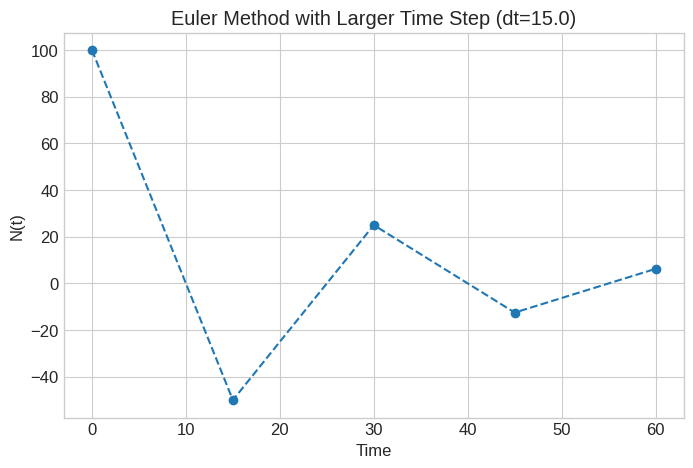

In [ ]:
# Parameters (lambda_ and N0 from previous cell)
# T_max_decay from previous cell

dt_large_decay = 15.0  # New, larger time step
time_large_dt_decay = np.arange(0, T_max_decay + dt_large_decay, dt_large_decay)

N_euler_large_dt = np.zeros_like(time_large_dt_decay)
N_euler_large_dt[0] = N0

for n_step in range(len(time_large_dt_decay) - 1):
    N_euler_large_dt[n_step + 1] = N_euler_large_dt[n_step] * (1 - lambda_ * dt_large_decay)

# Plotting
plt.plot(time_large_dt_decay, N_euler_large_dt, 'o--')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.title(f'Euler Method with Larger Time Step (dt={dt_large_decay})')
plt.grid(True)
plt.show()

### Numerical Instability
Observations:
*   With $\Delta t=1.0$, the solution was qualitatively correct.
*   With $\Delta t=15.0$ (given $\lambda=0.1$), we observe unphysical oscillations and negative values because $1 - \lambda \Delta t = 1 - 0.1 \cdot 15 = 1 - 1.5 = -0.5 < 0$.
*   The update rule becomes unstable if $1 - \lambda \Delta t < 0 \Rightarrow \Delta t > \frac{1}{\lambda}$.

This highlights the **conditional stability** of the explicit Euler method.

### Interpreting the Explicit Euler Scheme
The explicit Euler method assumes the decay rate is constant over the time step $\Delta t$, equal to its value at the *beginning* of the interval $[t^n, t^{n+1}]$.
$$ N^{n+1} = N^n - (\lambda N^n) \Delta t $$

### An Alternative Assumption: Implicit (Backward) Euler
What if we assume the rate is constant over $[t^n, t^{n+1}]$, but equal to its value at the *end* of the interval?
$$ N^{n+1} = N^n - (\lambda N^{n+1}) \Delta t $$
This is the **Backward (Implicit) Euler Method**. Rearranging for $N^{n+1}$:
$$ N^{n+1} (1 + \lambda \Delta t) = N^n \Rightarrow N^{n+1} = \frac{N^n}{1 + \lambda \Delta t} $$
This scheme is *unconditionally stable* for this problem.

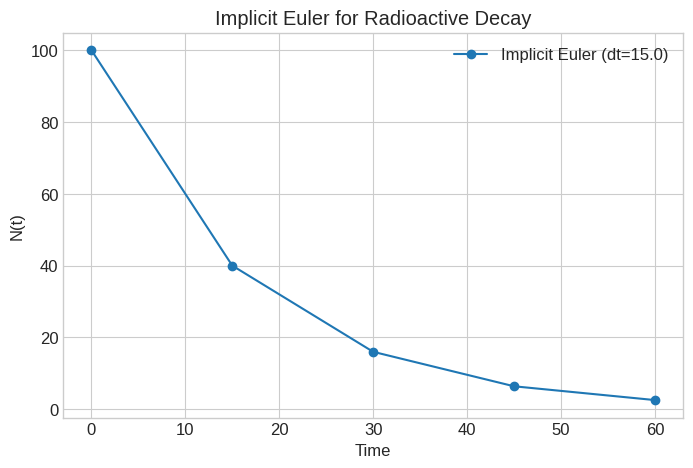

In [ ]:
# Python Implementation: Implicit Euler for Radioactive Decay

lambda_val_implicit = 0.1  # Decay constant (can be same as lambda_)
dt_implicit_decay = 15.0      # Time step (can be large)
T_implicit_decay = 60       # Total time
N0_implicit = 100           # Initial quantity

times_implicit = np.arange(0, T_implicit_decay + dt_implicit_decay, dt_implicit_decay)

N_implicit = np.zeros_like(times_implicit)
N_implicit[0] = N0_implicit

for n_step in range(len(times_implicit) - 1):
    N_implicit[n_step + 1] = N_implicit[n_step] / (1 + lambda_val_implicit * dt_implicit_decay)

plt.plot(times_implicit, N_implicit, 'o-', label=f'Implicit Euler (dt={dt_implicit_decay})')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.title('Implicit Euler for Radioactive Decay')
plt.legend()
plt.grid(True)
plt.show()

## Numerical Accuracy and Stability

### Analytical vs. Numerical (Explicit Euler)
Let's compare the numerical solution from Explicit Euler with the exact analytical solution $N(t) = N_0 e^{-\lambda t}$.

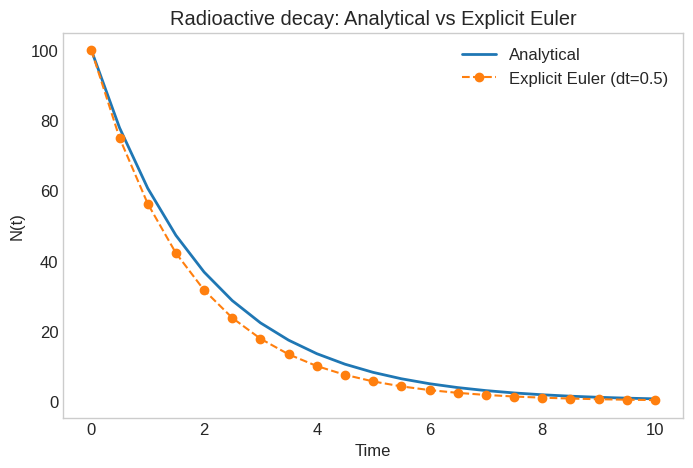

In [ ]:
# Parameters for accuracy comparison
lambda_acc = 0.5
N0_acc = 100
t_max_acc = 10
dt_acc = 0.5  # Try changing this: 0.1, 1.0, 1.9 (stable), 2.1 (unstable for lambda=0.5)

t_values_acc = np.arange(0, t_max_acc + dt_acc, dt_acc)

# Analytical solution
N_analytical_acc = N0_acc * np.exp(-lambda_acc * t_values_acc)

# Explicit Euler method
N_explicit_acc = np.zeros_like(t_values_acc) # Use np.zeros_like for consistency
N_explicit_acc[0] = N0_acc
for n_step in range(len(t_values_acc) - 1): # Corrected loop to use n_step+1 for assignment
    N_explicit_acc[n_step + 1] = N_explicit_acc[n_step] - lambda_acc * N_explicit_acc[n_step] * dt_acc

# Plotting
plt.plot(t_values_acc, N_analytical_acc, label='Analytical', lw=2)
plt.plot(t_values_acc, N_explicit_acc, 'o--', label=f'Explicit Euler (dt={dt_acc})')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.legend()
plt.grid()
plt.title('Radioactive decay: Analytical vs Explicit Euler')
plt.show()

### Definition of Error
We compare the numerical solution $N_n^{(\text{num})}$ with the exact (analytical) solution $N(t_n)$.

**Pointwise (absolute) error at time $t_n$**:
$$ \varepsilon_n = |N_n^{(\text{num})} - N(t_n)| $$
(Often the non-absolute difference $N_n^{(\text{num})} - N(t_n)$ is also called error, but absolute error is common for plotting magnitudes).

The error generally depends on:
*   the time step size $\Delta t$
*   the numerical method used
*   the regularity (smoothness) of the true solution

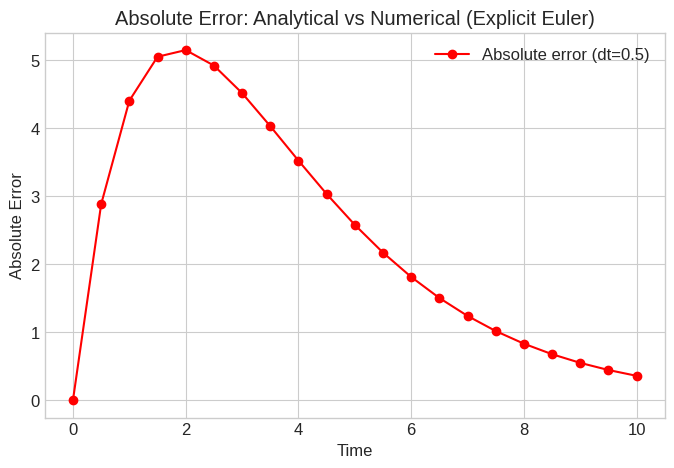

In [ ]:
# Plotting the Absolute Error

# Parameters (use from previous cell: lambda_acc, N0_acc, t_max_acc)
# dt_error_plot = 1.0  # Can choose a different dt for this specific plot
dt_error_plot = dt_acc # Or use the same dt as the accuracy plot above
t_error = np.arange(0, t_max_acc + dt_error_plot, dt_error_plot)

# Analytical solution
N_exact_error = N0_acc * np.exp(-lambda_acc * t_error)

# Explicit Euler method
N_num_error = np.zeros_like(t_error)
N_num_error[0] = N0_acc
for n_step in range(1, len(t_error)):
    N_num_error[n_step] = N_num_error[n_step-1] - lambda_acc * N_num_error[n_step-1] * dt_error_plot

# Compute absolute error
error_abs = np.abs(N_exact_error - N_num_error)

# Plot
plt.plot(t_error, error_abs, 'r-o', label=f'Absolute error (dt={dt_error_plot})')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.title('Absolute Error: Analytical vs Numerical (Explicit Euler)')
plt.legend()
plt.grid(True)
plt.show()

### Relative Error
The **relative error** is:
$$ \epsilon_{\text{rel}}(t) = \frac{|N_{\text{exact}}(t) - N_{\text{num}}(t)|}{|N_{\text{exact}}(t)|} \quad (\text{for } N_{\text{exact}}(t) \neq 0) $$
Relative error is more informative when:
*   The quantity of interest becomes very small.
*   We want to assess the error proportionally to the expected value.

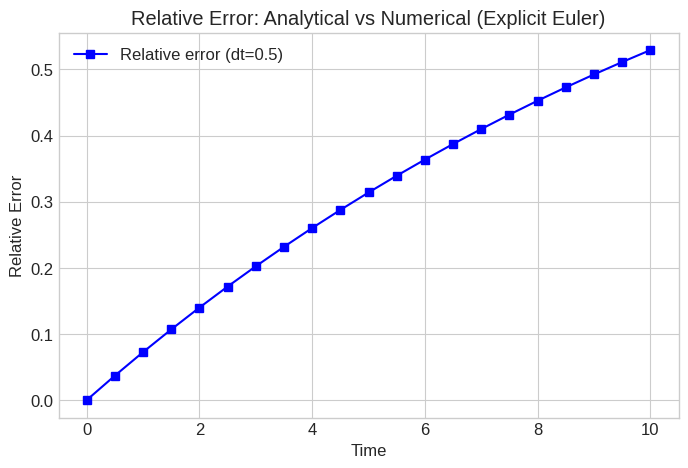

In [ ]:
# Plotting the Relative Error
# (Using N_exact_error and N_num_error from the previous cell)

# Compute relative error, avoiding division by zero
# N_exact_error is exponential, so > 0 for finite t.
# Add a small epsilon for safety if N_exact_error can be zero.
epsilon_div = 1e-15
rel_error = np.abs(N_exact_error - N_num_error) / (np.abs(N_exact_error) + epsilon_div)
# A more robust way for general cases:
# rel_error = np.zeros_like(N_exact_error)
# non_zero_mask = np.abs(N_exact_error) > epsilon_div
# rel_error[non_zero_mask] = np.abs(N_exact_error[non_zero_mask] - N_num_error[non_zero_mask]) / np.abs(N_exact_error[non_zero_mask])


# Plot
plt.plot(t_error, rel_error, 'b-s', label=f'Relative error (dt={dt_error_plot})')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.title('Relative Error: Analytical vs Numerical (Explicit Euler)')
plt.legend()
plt.grid(True)
plt.show()

### Numerical Accuracy
Accuracy refers to how close the numerical solution is to the exact (analytical) solution.
*   With explicit Euler, reducing $\Delta t$ generally improves accuracy (up to a point where round-off errors might dominate).
*   Accuracy is influenced by the method’s **order**: Euler’s method is *first-order accurate*.

### Numerical Stability
A numerical method is **stable** if errors do not grow uncontrollably.
*   Explicit Euler for decay is conditionally stable ($\Delta t \le 1/\lambda$).
*   Instability can make the numerical solution completely unreliable.



## Part 2: Implicit vs Explicit for Nonlinear ODEs

### Recap from Lecture 1
*   **Explicit (Euler):** Future value depends only on known quantities. Simple, conditionally stable.
*   **Implicit (Backward Euler):** Future value appears on both sides. More robust, can be unconditionally stable. For linear ODEs, implementation was straightforward.

**A Natural Question:** Should we always use implicit schemes because they are more stable?
Let's look at a **nonlinear ODE** where implementing an implicit scheme requires more effort.

*(Comparison of explicit unstable vs implicit stable from decay example)*
![Explicit Unstable](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/image4.png?raw=1)
![Implicit Stable](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/image5.png?raw=1)

### Water Infiltration into Soil
A common process in Earth sciences is rainwater infiltration into unsaturated soil.
*   Described by **Richards’ equation** (nonlinear PDE).
*   We consider a simplified, lumped, time-dependent version.
*   Model volumetric water content $\theta(t)$ decreasing due to percolation.

*Reference: Hillel, D. (1998). Environmental Soil Physics. Academic Press.*

![Soil Diagram](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/soil.png?raw=1)

*Water content $\theta$ is a ratio, from 0 (dry) to porosity (saturated).*

### A Simplified Model for Water Infiltration
Assume water is lost due to gravity-driven flow, with conductivity $K(\theta)$ depending on water content:
$$ \frac{d\theta}{dt} = -K(\theta) $$
A common empirical expression for hydraulic conductivity:
$$ K(\theta) = K_s \cdot \theta^n $$
where:
*   $K_s$: saturated conductivity (e.g., $10^{-5}$ to $10^{-6}$ m/s)
*   $n > 1$: nonlinearity parameter (e.g., $n = 3$ or $4$)

### Explicit Euler Scheme for Infiltration
Discretize $\frac{d\theta}{dt} = -K_s \theta^m$ using forward Euler:
$$ \theta^{k+1} = \theta^k - \Delta t \cdot K_s \cdot (\theta^k)^n $$

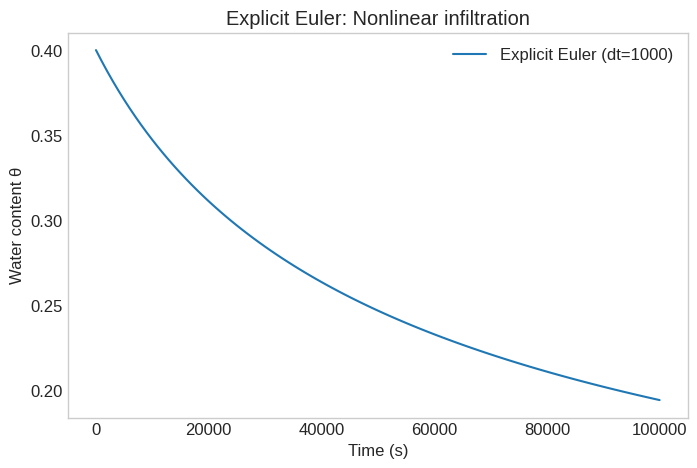

In [ ]:
# Explicit Euler for Nonlinear Infiltration

# Parameters
Ks_infil = 1e-4       # Saturated hydraulic conductivity
m_exp_infil = 3       # Nonlinearity exponent (using 'm' from equation)
dt_infil_exp = 1000    # Time step (s)
Tmax_infil = 100000    # Total time
theta0_infil = 0.4    # Initial water content

# Time array
t_infil_exp = np.arange(0., Tmax_infil + dt_infil_exp, dt_infil_exp)
theta_exp = np.zeros_like(t_infil_exp)
theta_exp[0] = theta0_infil

# Time integration
for k_idx in range(1, len(t_infil_exp)):
    theta_exp[k_idx] = theta_exp[k_idx-1] - dt_infil_exp * Ks_infil * theta_exp[k_idx-1]**m_exp_infil

# Plot
plt.plot(t_infil_exp, theta_exp, label=f'Explicit Euler (dt={dt_infil_exp})')
plt.xlabel("Time (s)")
plt.ylabel("Water content θ")
plt.title("Explicit Euler: Nonlinear infiltration")
plt.legend()
plt.grid()
plt.show()

### Implicit Scheme (Backward Euler) for Infiltration
The backward Euler scheme reads:
$$ \theta^{k+1} = \theta^k - \Delta t \cdot K_s \cdot (\theta^{k+1})^n $$
Let $X = \theta^{k+1}$. We need to find $X$ such that:
$$ X = \theta^k - \Delta t \cdot K_s \cdot X^n $$
Rearranging, we want to find the root of $G(X)$:
$$ G(X) = X + \Delta t \cdot K_s \cdot X^n - \theta^k = 0 $$
This is a **nonlinear algebraic equation** for $X = \theta^{k+1}$. We need a numerical root-finding method.

### Root-Finding: The Bisection Method - Idea
The **bisection method** finds a root of a continuous function $G(X)$.
*   Start with an interval $[a, b]$ where $G(a)$ and $G(b)$ have opposite signs ($G(a) \cdot G(b) < 0$).
*   The *Intermediate Value Theorem* guarantees a root in $(a, b)$.
*   Repeatedly halve the interval, keeping the subinterval with the sign change.

![Bisection Method Diagram](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/BisectionMethod.png?raw=1)

**Visual Steps:**
1. Find $a, b$ so $G(a)G(b)<0$.
2. Midpoint $c = (a+b)/2$.
3. If $G(c) \approx 0$, $c$ is root.
4. If $G(a)G(c)<0$, root is in $[a,c]$.
5. Else, root is in $[c,b]$.
6. Repeat.

### The Bisection Method - Algorithm
Given $G(X)$, interval $[a_0, b_0]$ with $G(a_0)G(b_0) < 0$, tolerances $\epsilon_X$ and $\epsilon_F$:
1.  **Initialize:** $a = a_0$, $b = b_0$.
2.  **Iterate:**
    1. Midpoint: $c = (a+b)/2$.
    2. Evaluate $G(c)$.
    3. **Check convergence:** If $|G(c)| < \epsilon_F$ OR $(b-a)/2 < \epsilon_X$, then $c$ is the root. Stop.
    4. **Update interval:**
        *   If $G(a) \cdot G(c) < 0$, set $b=c$.
        *   Else, set $a=c$.
3.  If max iterations reached, report failure.

### Why Python Functions for Root-Finding?
The bisection algorithm evaluates $G(X)$ many times.
*   Defining $G(X)$ as a Python **function** makes code cleaner, reusable, and understandable.
*   Separates "what function to solve" from "how to solve it".

**Defining a function in Python:**

```python
def function_name(parameter1, parameter2, ...):
    """Optional: Docstring explaining what the function does."""
    # Body of the function: calculations
    result = parameter1 + parameter2 # Example
    return result # Value returned by the function
```    


In [ ]:
def add_numbers(x, y):
    """This function returns the sum of x and y."""
    sum_val = x + y
    return sum_val

z = add_numbers(5, 3)  # z will be 8
print(f"Example of function call: add_numbers(5,3) = {z}")

### Implicit Infiltration: Python Functions for Bisection
For $G(X) = X + \Delta t \cdot K_s \cdot X^n - \theta^k = 0$.
Let $X = \theta^{k+1}$ and $\theta_{prev} = \theta^k$.

**1. Function to Solve, $G(X)$:**

In [ ]:
def G_infiltration(X_current, theta_prev, dt, Ks, n_exponent):
    """
    Calculates G(X) = X + dt*Ks*X^m - theta_prev for root finding.
    X_current:  The current guess for theta^{k+1}.
    theta_prev: Water content from previous step, theta^k.
    dt: Time step.
    Ks: Saturated hydraulic conductivity.
    m_exponent: Nonlinearity exponent.
    """
    term_nonlinear = dt * Ks * (X_current ** n_exponent)
    return X_current + term_nonlinear - theta_prev

In [ ]:
def bisection_solver(func_G, a, b, tol=1e-7, max_iter=100,
                     args_for_G=()):
    """
    Finds a root of func_G(x, *args_for_G) = 0 in [a,b] by bisection.
    args_for_G: A tuple of additional fixed arguments for func_G.
    """
    Ga = func_G(a, *args_for_G)
    Gb = func_G(b, *args_for_G) # Calculate Gb as well

    if Ga * Gb > 0: # Check if signs are NOT opposite (and neither is zero)
        # Handle cases where a or b is already a root
        if abs(Ga) < tol: return a
        if abs(Gb) < tol: return b

        raise ValueError("Bisection: G(a) and G(b) must have opposite signs for a robust start.")


    for i in range(max_iter):
        c = (a + b) / 2.0

        # Check interval width first for convergence
        if (b - a) / 2.0 < tol:
            return c

        Gc = func_G(c, *args_for_G)

        # Check function value at c for convergence
        if abs(Gc) < tol:
            return c

        if Ga * Gc < 0: # Root is in [a, c]
            b = c
            # Gb = Gc # Optional: update Gb if c becomes the new b
        else: # Root is in [c, b]
            a = c
            Ga = Gc # Crucial: update Ga if c becomes the new a

    # print(f"Warning: Bisection did not converge within {max_iter} iterations.")
    return (a + b) / 2.0 # Return best estimate if max_iter reached

### Implicit Euler with Bisection: Python Implementation

**Algorithm Steps for each time step `i`:**
1. We know $\theta[i-1]$ (i.e., $\theta^k$).
2. We want to find $\theta[i]$ (i.e., $\theta^{k+1}$).
3. Function to solve: $G(X) = X + \Delta t K_s X^n - \theta[i-1] = 0$.
4. Interval for $X$: $[a,b]$. For physical reasons (water content $\theta \ge 0$ and decreases or stays constant if $K_s=0$), a good choice is $a=0$ and $b=\theta[i-1]$.
    * $G(0) = -\theta[i-1] \le 0$.
    * $G(\theta[i-1]) = \theta[i-1] + \Delta t K_s (\theta[i-1])^n - \theta[i-1] = \Delta t K_s (\theta[i-1])^n \ge 0$.
    * If $\theta[i-1]>0$, signs are opposite (or $G(\theta[i-1])=0$ if $K_s=0$ or $\theta[i-1]=0$).
5. Use `bisection_solver` to find $X = \theta[i]$ such that $G(X) \approx 0$.

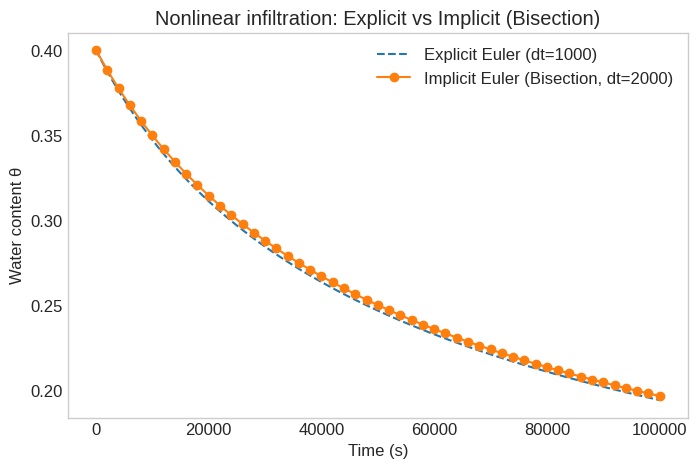

In [ ]:
# --- Simulation Parameters (can reuse Ks_infil, m_exp_infil, theta0_infil) ---
dt_infil_imp = 2000       # Time step (s) - can be larger for implicit
Tmax_infil_imp = 100000    # Total time
tol_bisection_infil = 1e-7 # Tolerance for bisection

# --- Time array and solution initialization ---
t_infil_imp = np.arange(0., Tmax_infil_imp + dt_infil_imp, dt_infil_imp)
theta_implicit_infil = np.zeros_like(t_infil_imp)
theta_implicit_infil[0] = theta0_infil

# --- Time integration (Implicit Euler with Bisection) ---
for i_idx in range(1, len(t_infil_imp)):
    theta_prev_step = theta_implicit_infil[i_idx-1]

    if theta_prev_step < tol_bisection_infil: # Effectively zero
        theta_implicit_infil[i_idx] = 0.0
        continue

    # Define arguments for G_infiltration for this step
    # args_for_G expects (theta_prev, dt, Ks, m_exponent)
    current_args = (theta_prev_step, dt_infil_imp, Ks_infil, m_exp_infil)

    # Set interval for bisection: [a_bis, b_bis]
    a_bis = 0.0
    b_bis = theta_prev_step

    # Robustness check for bisection interval before calling
    val_G_a = G_infiltration(a_bis, *current_args)
    val_G_b = G_infiltration(b_bis, *current_args)

    if val_G_a * val_G_b > 0:
        if abs(val_G_a) < tol_bisection_infil: # a_bis is already a root
            theta_implicit_infil[i_idx] = a_bis
        elif abs(val_G_b) < tol_bisection_infil: # b_bis is already a root
            theta_implicit_infil[i_idx] = b_bis
        else:
            # This case should ideally not happen if theta_prev_step > 0
            # due to the nature of G(X) for this problem.
            # It might indicate theta_prev_step is extremely small or an issue.
            print(f"Warning: Bisection interval G(a)G(b) > 0 at t={t_infil_imp[i_idx]}, theta_prev={theta_prev_step}")
            print(f"G(a)={val_G_a}, G(b)={val_G_b}. Using previous theta as fallback.")
            theta_implicit_infil[i_idx] = theta_prev_step # Fallback
        continue # Move to next time step

    try:
        theta_implicit_infil[i_idx] = bisection_solver(G_infiltration,
                                                     a_bis, b_bis,
                                                     tol=tol_bisection_infil,
                                                     args_for_G=current_args)
    except (ValueError, RuntimeError) as e:
        print(f"Error during bisection at t={t_infil_imp[i_idx]}: {e}")
        print("Using previous theta as fallback.")
        theta_implicit_infil[i_idx] = theta_prev_step
        # break # Optionally stop simulation

# --- Plotting ---
plt.plot(t_infil_exp, theta_exp, '--', label=f'Explicit Euler (dt={dt_infil_exp})') # Plot explicit too for comparison
plt.plot(t_infil_imp, theta_implicit_infil, 'o-', label=f'Implicit Euler (Bisection, dt={dt_infil_imp})')
plt.xlabel("Time (s)")
plt.ylabel("Water content θ")
plt.title("Nonlinear infiltration: Explicit vs Implicit (Bisection)")
plt.legend()
plt.grid()
plt.show()

## Part 3: Finite Difference Approximations

### From Differential Equations to Approximating Derivatives
We've seen that many Earth Science processes are described by **differential equations**:
*   Radioactive Decay: $\frac{dN}{dt} = -\lambda N$
*   Newton's Cooling: $\frac{dT}{dt} = -k(T-T_a)$
*   Water Infiltration: $\frac{d\theta}{dt} = -K_s \theta^n$

To solve these numerically, we need to **approximate derivatives** using discrete values.

### Recalling Time Derivatives: Our First Finite Differences
We already used finite differences for the **time derivative** $\frac{dy}{dt}$:

**Explicit (Forward) Euler for $\frac{dy}{dt} = f(y,t)$:**
$$ \frac{y^{k+1} - y^k}{\Delta t} \approx f(y^k, t^k) $$
$\frac{y^{k+1} - y^k}{\Delta t}$ is a *forward difference approximation* of $\frac{dy}{dt}$ at $t^k$.

**Implicit (Backward) Euler for $\frac{dy}{dt} = f(y,t)$:**
$$ \frac{y^{k+1} - y^k}{\Delta t} \approx f(y^{k+1}, t^{k+1}) $$

Now, we extend this to approximate derivatives with respect to **spatial variables** (e.g., $\frac{\partial q}{\partial x}$).

### Finite Difference Method (FDM): Introduction
*   Introduced by Euler (18th century).
*   Replaces partial derivatives with approximations using node values, leading to algebraic equations.
*   Typically used on structured grids.
*   Easy to implement.

For a 1D grid with uniform spacing $\Delta x$, points are $x_i$.
![1D Grid](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/grid.png?raw=1)

At each grid point $x_i$, we approximate $\left( \frac{\partial q}{\partial x} \right)_{x_i} \approx F(\dots, q_{i-1}, q_{i}, q_{i+1}, \dots)$.
![Grid with q values](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/grid_copy.png?raw=1)

The idea comes from the derivative definition:
$$ \left( \frac{dq}{dx} \right)_{x_i} = \lim_{\delta x \to 0} \frac{ q(x_i + \delta x)- q(x_i)}{\delta x} $$
We replace $\delta x$ with a finite $\Delta x$.

### Approximating the First Derivative
We want to approximate the slope of $q(x)$ at $x_i$.
![Slope illustration](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/slope1.png?raw=1)

**Forward Difference Scheme:** Uses $q_i$ and $q_{i+1}$.
$$ \left( \frac{dq}{dx} \right)_{x_i} \approx \frac{ q_{i+1} - q_i }{\Delta x} $$
![Forward Difference](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/slope_fw.png?raw=1)

**Backward Difference Scheme:** Uses $q_i$ and $q_{i-1}$.
$$ \left( \frac{dq}{dx} \right)_{x_i} \approx \frac{ q_{i} - q_{i-1} }{\Delta x} $$
![Backward Difference](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/slope_bw.png?raw=1)

**Central Difference Scheme:** Uses $q_{i-1}$ and $q_{i+1}$.
$$ \left( \frac{dq}{dx} \right)_{x_i} \approx \frac{ q_{i+1} - q_{i-1} }{2\Delta x} $$
![Central Difference](https://github.com/demichie/PhD_ModelingCourse/blob/main/Lecture2/FIGURES/slope_cent.png?raw=1)

### Accuracy of Finite Difference Schemes

**Accuracy and Truncation Error**
The **truncation error** is the difference between the exact derivative and its finite difference approximation. It arises from truncating a Taylor series.
$$ \frac{q(x_{i+1})-q(x_{i})}{\Delta x} = \left( \frac{dq}{dx} \right)_{x_i} + \text{Truncation Error} $$

**Taylor Series Expansion**
Around $x_i$:
$$ q(x) = q(x_i) + (x-x_i)\left( \frac{dq}{dx} \right)_{x_i} + \frac{(x-x_i)^2}{2!}\left( \frac{d^2q}{dx^2} \right)_{x_i} + \frac{(x-x_i)^3}{3!}\left( \frac{d^3q}{dx^3} \right)_{x_i} + O((x-x_i)^4) $$


For $x = x_{i+1} = x_i + \Delta x$:
$$ q(x_{i+1}) = q_i + \Delta x \left( \frac{dq}{dx} \right)_{i} + \frac{\Delta x^2}{2}\left( \frac{d^2q}{dx^2} \right)_{i} + \frac{\Delta x^3}{6}\left( \frac{d^3q}{dx^3} \right)_{i} + O(\Delta x^4) $$
For $x = x_{i-1} = x_i - \Delta x$:
$$ q(x_{i-1}) = q_i - \Delta x \left( \frac{dq}{dx} \right)_{i} + \frac{\Delta x^2}{2}\left( \frac{d^2q}{dx^2} \right)_{i} - \frac{\Delta x^3}{6}\left( \frac{d^3q}{dx^3} \right)_{i} + O(\Delta x^4) $$
$O(\Delta x^k)$ means "terms of order $\Delta x^k$ and higher."

**Truncation Error: Forward Difference**
From $q(x_{i+1})$ expansion:
$$ \frac{q_{i+1} - q_i}{\Delta x} = \left( \frac{dq}{dx} \right)_{x_i} + {\frac{\Delta x}{2} \left( \frac{d^2q}{dx^2} \right)_{x_i}} + O(\Delta x^2) $$
The leading error term is $\propto \Delta x$. This is **first-order accurate**, $O(\Delta x)$.

**Truncation Error: Backward Difference**
From $q(x_{i-1})$ expansion:
$$ \frac{q_i - q_{i-1}}{\Delta x} = \left( \frac{dq}{dx} \right)_{x_i} - {\frac{\Delta x}{2} \left( \frac{d^2q}{dx^2} \right)_{x_i}} + O(\Delta x^2) $$
Also **first-order accurate**, $O(\Delta x)$.

**Truncation Error: Central Difference**
Subtracting $q(x_{i-1})$ expansion from $q(x_{i+1})$ expansion:
$$ q(x_{i+1}) - q(x_{i-1}) = 2 \Delta x \left( \frac{dq}{dx} \right)_{x_i} + \frac{2\Delta x^3}{6}\left( \frac{d^3q}{dx^3} \right)_{x_i} + O(\Delta x^5) $$
So,
$$ \frac{q_{i+1} - q_{i-1}}{2\Delta x} = \left( \frac{dq}{dx} \right)_{x_i} + {\frac{\Delta x^2}{6}\left( \frac{d^3q}{dx^3} \right)_{x_i}} + O(\Delta x^4) $$
The leading error term is $\propto \Delta x^2$. This is **second-order accurate**, $O(\Delta x^2)$.

**Summary & Remarks:**
*   Truncation error measures local accuracy.
*   Order of accuracy: power of $\Delta x$ in the leading error term.
*   Higher order uses more points or cancels more Taylor terms.

### Finite Differences: Practical Examples and Order Verification

Let's apply these schemes to $f(x) = x^2$ and $f(x) = \sin(x)$.

**Printing Formatted Output: F-Strings in Python**
F-strings (Python 3.6+) embed expressions in strings using `f"..."` and `{expression}`.

In [ ]:
variable_name = "World"
number = 42
print(f"Hello, {variable_name}! The number is {number}.")

In [ ]:
dx = 0.1
f_prime_forward = 1.9000
error_forward = 0.1000
print(f"Forward Diff (dx={dx:.2f}): {f_prime_forward:.4f}, Error: {error_forward:.4e}")

#### Example 1: $f(x) = x^2$
Analytical derivative: $f'(x) = 2x$. At $x_0 = 1.0$, $f'(1.0) = 2.0$.
Let $\Delta x = 0.1$.

In [ ]:
# Example 1: f(x) = x^2

def func_x_squared(x):
    return x**2

def deriv_x_squared(x):
    return 2*x

# Point and step size
x0_ex1 = 1.0
dx_ex1 = 0.1

# Exact derivative
f_prime_exact_ex1 = deriv_x_squared(x0_ex1)
print(f"Exact derivative of x^2 at x={x0_ex1}: {f_prime_exact_ex1:.4f}")

# Function values
f_x0_val = func_x_squared(x0_ex1)
f_x0_plus_dx_val = func_x_squared(x0_ex1 + dx_ex1)
f_x0_minus_dx_val = func_x_squared(x0_ex1 - dx_ex1)

# Forward Difference
f_prime_forward_ex1 = (f_x0_plus_dx_val - f_x0_val) / dx_ex1
error_forward_ex1 = abs(f_prime_forward_ex1 - f_prime_exact_ex1)
print(f"Forward Diff (dx={dx_ex1:.2f}): {f_prime_forward_ex1:.4f}, Error: {error_forward_ex1:.4e}")

# Backward Difference
f_prime_backward_ex1 = (f_x0_val - f_x0_minus_dx_val) / dx_ex1
error_backward_ex1 = abs(f_prime_backward_ex1 - f_prime_exact_ex1)
print(f"Backward Diff (dx={dx_ex1:.2f}): {f_prime_backward_ex1:.4f}, Error: {error_backward_ex1:.4e}")

# Central Difference
f_prime_central_ex1 = (f_x0_plus_dx_val - f_x0_minus_dx_val) / (2 * dx_ex1)
error_central_ex1 = abs(f_prime_central_ex1 - f_prime_exact_ex1)
print(f"Central Diff (dx={dx_ex1:.2f}): {f_prime_central_ex1:.4f}, Error: {error_central_ex1:.4e}")

# Note: For f(x)=x^2, f'''(x) = 0, so the central difference error term is theoretically zero.
# The printed error_central should be very close to machine precision (e.g., 0 or 1e-15).

#### Example 2: $f(x)=\sin(x)$

Analytical derivative: $f'(x) = \cos(x)$. At $x_0 = \pi/4$, $f'(\pi/4) = \cos(\pi/4) \approx 0.7071$.

Let $\Delta x = 0.1$.

In [ ]:
# Example 2: f(x) = sin(x)

def func_sin(x):
    return np.sin(x)

def deriv_sin(x):
    return np.cos(x)

# Point and step size
x0_sin_ex2 = np.pi / 4.0
dx_sin_ex2 = 0.1

# Exact derivative
f_prime_exact_sin_ex2 = deriv_sin(x0_sin_ex2)
print(f"Exact derivative of sin(x) at x={x0_sin_ex2:.4f}: {f_prime_exact_sin_ex2:.4f}")

# Function values
f_x0_sin_val = func_sin(x0_sin_ex2)
f_x0_plus_dx_sin_val = func_sin(x0_sin_ex2 + dx_sin_ex2)
f_x0_minus_dx_sin_val = func_sin(x0_sin_ex2 - dx_sin_ex2)

# Forward Difference
f_prime_forward_sin_ex2 = (f_x0_plus_dx_sin_val - f_x0_sin_val) / dx_sin_ex2
error_forward_sin_ex2 = abs(f_prime_forward_sin_ex2 - f_prime_exact_sin_ex2)
print(f"Fwd Sin (dx={dx_sin_ex2:.2f}): {f_prime_forward_sin_ex2:.4f}, Error: {error_forward_sin_ex2:.4e}")

# Backward Difference
f_prime_backward_sin_ex2 = (f_x0_sin_val - f_x0_minus_dx_sin_val) / dx_sin_ex2
error_backward_sin_ex2 = abs(f_prime_backward_sin_ex2 - f_prime_exact_sin_ex2)
print(f"Bwd Sin (dx={dx_sin_ex2:.2f}): {f_prime_backward_sin_ex2:.4f}, Error: {error_backward_sin_ex2:.4e}")

# Central Difference
f_prime_central_sin_ex2 = (f_x0_plus_dx_sin_val - f_x0_minus_dx_sin_val) / (2 * dx_sin_ex2)
error_central_sin_ex2 = abs(f_prime_central_sin_ex2 - f_prime_exact_sin_ex2)
print(f"Ctrl Sin (dx={dx_sin_ex2:.2f}): {f_prime_central_sin_ex2:.4f}, Error: {error_central_sin_ex2:.4e}")

### Numerically Verifying the Order of Accuracy
Error $\approx C \cdot (\Delta x)^p$. Taking logarithms:
$$ \log(\text{Error}) \approx \log(C) + p \cdot \log(\Delta x) $$
This is $Y = A + pX$. So, a plot of $\log(\text{Error})$ vs $\log(\Delta x)$ (a **log-log plot**) should be a line with slope $p$.

**Understanding Log-Log Plots:**
*   Useful for power-law relationships and data spanning orders of magnitude.
*   Slope indicates convergence rate:
    *   Order $p=1$: Halving $\Delta x$ halves error (slope 1 on log-log).
    *   Order $p=2$: Halving $\Delta x$ quarters error (slope 2 on log-log).
*   Higher order $\Rightarrow$ steeper slope $\Rightarrow$ faster convergence.


In [ ]:
# Order Verification for sin(x)

# (Assumes func_sin, deriv_sin, x0_sin_ex2, f_prime_exact_sin_ex2 are defined)
x0_for_order = x0_sin_ex2 # Use the same x0 as before
exact_deriv_for_order = f_prime_exact_sin_ex2

# Range of dx values
dx_values_order = np.logspace(-1, -5, 10) # From 10^-1 to 10^-5, 10 points

errors_forward_order = []
errors_backward_order = []
errors_central_order = []

for dx_val_order in dx_values_order:
    f0_ord = func_sin(x0_for_order)
    f_plus_ord = func_sin(x0_for_order + dx_val_order)
    f_minus_ord = func_sin(x0_for_order - dx_val_order)

    errors_forward_order.append(abs(((f_plus_ord - f0_ord) / dx_val_order) - exact_deriv_for_order))
    errors_backward_order.append(abs(((f0_ord - f_minus_ord) / dx_val_order) - exact_deriv_for_order))
    errors_central_order.append(abs(((f_plus_ord - f_minus_ord) / (2 * dx_val_order)) - exact_deriv_for_order))

errors_forward_order = np.array(errors_forward_order)
errors_backward_order = np.array(errors_backward_order)
errors_central_order = np.array(errors_central_order)

# Plotting
plt.figure(figsize=(9, 7))
plt.loglog(dx_values_order, errors_forward_order, 'o-', label='Forward')
plt.loglog(dx_values_order, errors_backward_order, 's--', label='Backward')
plt.loglog(dx_values_order, errors_central_order, '^-', label='Central')

# Reference lines for slopes
if len(dx_values_order) > 0:
    # Order 1 reference (adjust C1 to align with first point of forward error)
    C1 = errors_forward_order[0] / dx_values_order[0]
    plt.loglog(dx_values_order, C1 * dx_values_order**1, 'k:', lw=1.5, label='Slope 1 Ref')

    # Order 2 reference (adjust C2 to align with first point of central error)
    C2 = errors_central_order[0] / (dx_values_order[0]**2)
    plt.loglog(dx_values_order, C2 * dx_values_order**2, 'k--', lw=1.5, label='Slope 2 Ref')

plt.xlabel('$\Delta x$ (Step Size)')
plt.ylabel('Absolute Error')
plt.title('Log-Log Plot: Error vs. $\Delta x$ for Approximating $f\'(\sin(x))$')
plt.legend(loc='best')
plt.grid(True, which="both", ls="-", alpha=0.6)
# plt.gca().invert_xaxis() # Make dx decrease to the right if preferred
plt.show()

**Interpreting the Log-Log Plot:**
*   **Linear Segments:** Data points for each method form roughly straight lines (for larger $\Delta x$). Slopes indicate observed order.
*   **Forward/Backward:** Slope close to 1.
*   **Central:** Slope close to 2 (more accurate, faster convergence).
*   **Round-off Error Domination:** For extremely small $\Delta x$ (e.g., $10^{-8}$ or less), error might increase or become erratic due to finite machine precision (catastrophic cancellation). For $\Delta x$ in $10^{-1}$ to $10^{-5}$, truncation error usually dominates.

This numerical experiment confirms our theoretical understanding of scheme accuracy.
